# Definiciones

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage import img_as_ubyte

import albumentations as A


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
def plot_img_mask(img, mask, cmap = None):
    fig, axs = plt.subplots(1, 2, figsize=(8, 8))
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[0].axis('off')
    axs[1].imshow(mask, cmap = cmap )
    axs[1].set_title('Mask')
    axs[1].axis('off')
    plt.show()

In [ ]:
def plot_img_mask_path(img_path, mask_path, cmap = None):
    img = imread(img_path)
    mask = imread(mask_path)

    fig, axs = plt.subplots(1, 2, figsize=(8, 8))
    axs[0].imshow(img)
    axs[0].set_title('Image')
    axs[0].axis('off')
    axs[1].imshow(mask, cmap = cmap )
    axs[1].set_title('Mask')
    axs[1].axis('off')
    plt.show()

In [ ]:
def compare_images_and_masks(original_img: np.ndarray, original_mask: np.ndarray,
                             transformed_img: np.ndarray, transformed_mask: np.ndarray,
                             figsize = (5,5)):
    """
    Compares and visualizes the original image and mask vs. the transformed image and mask.

    Args:
    - original_img (np.ndarray): Original image (e.g., RGB image).
    - original_mask (np.ndarray): Original mask (e.g., class labels or binary mask).
    - transformed_img (np.ndarray): Transformed image (e.g., after augmentation).
    - transformed_mask (np.ndarray): Transformed mask (e.g., after corresponding augmentation).
    """

    # Convert images and masks to uint8 for proper visualization (if necessary)
    original_img = img_as_ubyte(original_img)
    transformed_img = img_as_ubyte(transformed_img)

    # Create subplots for side-by-side comparison
    fig, axes = plt.subplots(2, 2, figsize = figsize)

    # Original Image and Mask
    axes[0, 0].imshow(original_img)
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')  # Turn off axis labels

    axes[0, 1].imshow(original_mask, cmap='jet')  # Assuming mask is categorical (e.g., segmented regions)
    axes[0, 1].set_title('Original Mask')
    axes[0, 1].axis('off')  # Turn off axis labels

    # Transformed Image and Mask
    axes[1, 0].imshow(transformed_img)
    axes[1, 0].set_title('Transformed Image')
    axes[1, 0].axis('off')  # Turn off axis labels

    axes[1, 1].imshow(transformed_mask, cmap='jet')  # Assuming mask is categorical (e.g., segmented regions)
    axes[1, 1].set_title('Transformed Mask')
    axes[1, 1].axis('off')  # Turn off axis labels

    # Show the plot
    plt.tight_layout()
    plt.show()

# Carga imágenes

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1EGbwVzcHUjCgYN9_jRQS-t1voY983P6D' -O imagenes_prueba.zip
!unzip imagenes_prueba.zip

--2024-11-18 18:19:01--  https://docs.google.com/uc?export=download&id=1EGbwVzcHUjCgYN9_jRQS-t1voY983P6D
Resolving docs.google.com (docs.google.com)... 172.217.204.100, 172.217.204.101, 172.217.204.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1EGbwVzcHUjCgYN9_jRQS-t1voY983P6D&export=download [following]
--2024-11-18 18:19:02--  https://drive.usercontent.google.com/download?id=1EGbwVzcHUjCgYN9_jRQS-t1voY983P6D&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10992 (11K) [application/octet-stream]
Saving to: ‘imagenes_prueba.zip’

imagenes_prueba.zip 100%[===================>]  10.73K  --.-K

Vamos a cargar una imágen y su respectiva máscara para realizar pruebas

In [ ]:
# Load the images
IMG_PATH = os.path.join( os.getcwd(), "imagenes_prueba","12.jpg" )
MASK_PATH = os.path.join( os.getcwd(), "imagenes_prueba", "12_mask.png" )

ORIGINAL_IMG = imread(IMG_PATH)
ORIGINAL_MASK = imread(MASK_PATH)

In [ ]:
ORIGINAL_IMG.shape

(256, 256, 3)

In [ ]:
ORIGINAL_MASK.shape

(256, 256)

Original Image


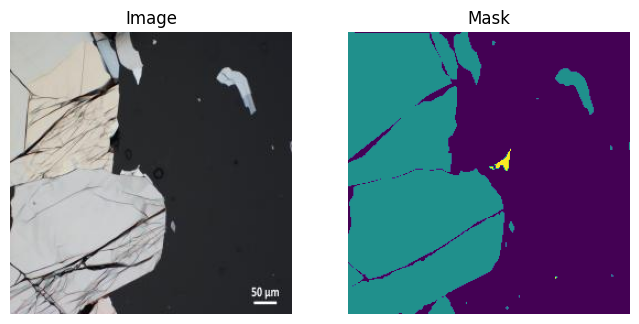

In [ ]:
print("Original Image")
plot_img_mask(ORIGINAL_IMG, ORIGINAL_MASK)

# Rotate

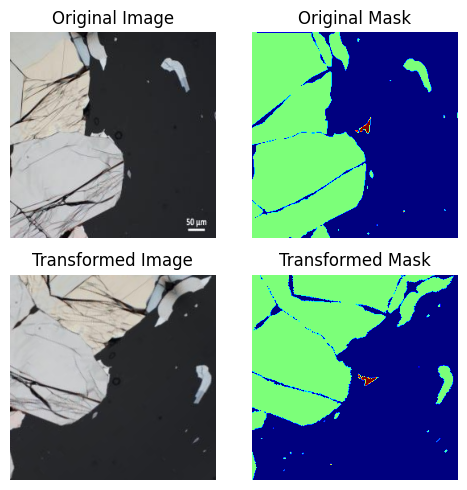

In [ ]:
rotate = A.Rotate(p=1)
img_rotate = rotate(image = ORIGINAL_IMG, mask= ORIGINAL_MASK, p=1)
compare_images_and_masks(ORIGINAL_IMG, ORIGINAL_MASK, img_rotate['image'], img_rotate['mask'])

# Horizontal Flip

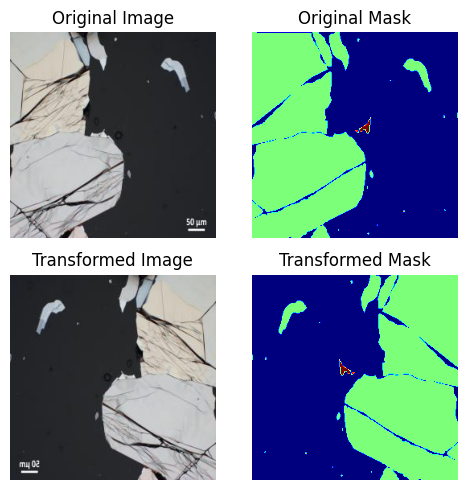

In [ ]:
horizontal_flip = A.HorizontalFlip(p=1)
img_horizontal_flip = horizontal_flip(image = ORIGINAL_IMG, mask= ORIGINAL_MASK)
compare_images_and_masks(ORIGINAL_IMG, ORIGINAL_MASK, img_horizontal_flip['image'], img_horizontal_flip['mask'])

# Vertical Flip

Observar que el vertical flip se parece mucho al Rotate que ya empleamos, por lo qeu no será necesario.

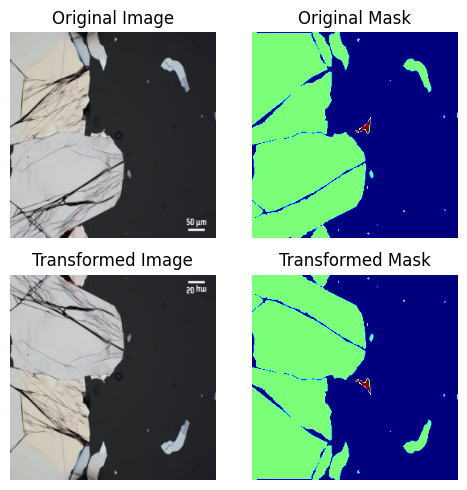

In [ ]:
vertical_flip = A.VerticalFlip(p=1)
img_vertical_flip = vertical_flip(image = ORIGINAL_IMG, mask= ORIGINAL_MASK)
compare_images_and_masks(ORIGINAL_IMG, ORIGINAL_MASK, img_vertical_flip['image'], img_vertical_flip['mask'])

# Bright contrast

Ejecutar varias veces para ver cómo se altera las imágenes (no sus mácaras)

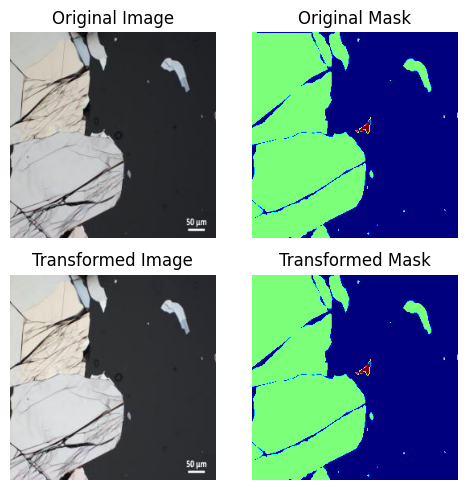

In [ ]:
bright_contrast = A.RandomBrightnessContrast(p=1)
img_bright_contrast = bright_contrast(image = ORIGINAL_IMG, mask= ORIGINAL_MASK)
compare_images_and_masks(ORIGINAL_IMG, ORIGINAL_MASK, img_bright_contrast['image'], img_bright_contrast['mask'])

# Gamma

Corrección gamma

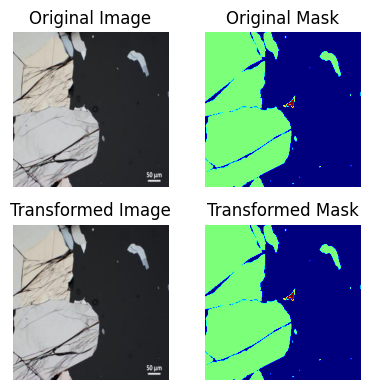

In [ ]:
gamma = A.RandomGamma(p=1)
img_gamma = gamma(image = ORIGINAL_IMG, mask= ORIGINAL_MASK)
compare_images_and_masks(ORIGINAL_IMG, ORIGINAL_MASK, img_gamma['image'], img_gamma['mask'], figsize = (4,4))

# Gaussian Blur

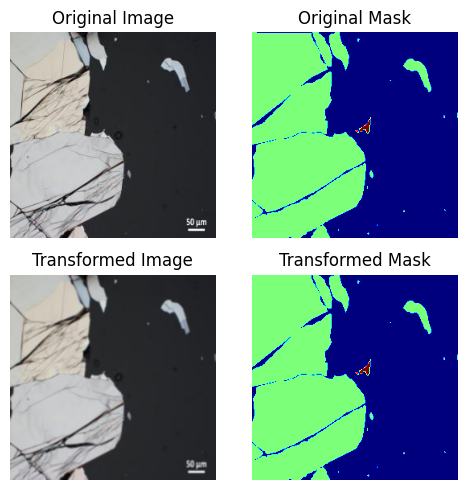

In [ ]:
gaussian_blur = A.GaussianBlur(p=1, blur_limit=(3, 7))
img_gaussian_blur = gaussian_blur(image = ORIGINAL_IMG, mask= ORIGINAL_MASK)
compare_images_and_masks(ORIGINAL_IMG, ORIGINAL_MASK, img_gaussian_blur['image'], img_gaussian_blur['mask'])

# Gauss Noise

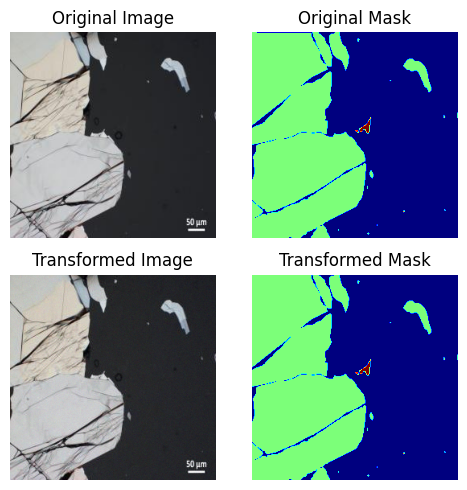

In [ ]:
gauss_noise = A.GaussNoise(p=1)
img_gauss_noise = gauss_noise(image = ORIGINAL_IMG, mask= ORIGINAL_MASK)
compare_images_and_masks(ORIGINAL_IMG, ORIGINAL_MASK, img_gauss_noise['image'], img_gauss_noise['mask'])

In [ ]:
type(img_gauss_noise)

dict

# Augmentation Pipeline

In [ ]:
def augment_image(image: np.ndarray, mask: np.ndarray, N: int):
    """
    Augments the input image N times using an Albumentations pipeline and
    returns two list of augmented images and masks.

    Args:
    - image (np.ndarray): Input image as a numpy array.
    - mask (np.ndarray): Input mask as a numpy array.
    - N (int): Number of augmented images to generate.

    Returns:
    - augment_images (list): List containing augmented images.
    - augment_masks (list): List containing augmented masks.
    """

    # Define the augmentation pipeline
    transform = A.Compose([
        A.GaussNoise(p=0.2), # Gaussian noise
        A.RandomBrightnessContrast(p=0.35),  # Random brightness/contrast change
        A.Rotate(p=0.6),  # Random rotation between -90 and 90 degrees
        A.HorizontalFlip(p=0.5),  # Random horizontal flip
        #A.VerticalFlip(p=0.5),    # Random vertical flip
        # WE DO NOT USE GAUSSIAN BLUR
        #A.GaussianBlur(blur_limit=(3, 5), p=1),  # Random Gaussian blur
    ])

    augment_images = []
    augment_masks = []

    # Generate N augmented images
    for i in range(N):
        transform_result = transform(image=image, mask=mask)
        augment_images.append(transform_result["image"])
        augment_masks.append(transform_result["mask"])
    return augment_images, augment_masks


In [ ]:
def zeros_arr_generator(size, max_iter=50):
    """
    Generates a random array of integers of the specified size with values between 0 and 1,
    and ensures that the array contains at least one non-zero element. If no non-zero element
    is found after `max_iter` iterations, the function will return the last generated array.

    Args:
        size (int or tuple of ints): The shape of the array to be generated. Can be an integer
                                      for a 1D array or a tuple for a multi-dimensional array.
        max_iter (int, optional): The maximum number of iterations to attempt generating a valid
                                  array. Defaults to 10.

    Returns:
        numpy.ndarray: A random integer array of shape `size` containing at least one non-zero element.

    Raises:
        ValueError: If no valid array is found within `max_iter` iterations (all arrays generated
                    are full of zeros).
    """
    for i in range(max_iter):
        random_array = np.random.randint(2, size=size)  # Generate a random array with 0s and 1s
        if not np.all(random_array == 0):  # Check if the array has at least one non-zero element
            return random_array

    # If no valid array was found after max_iter attempts, raise an error
    raise ValueError(f"Unable to generate an array with non-zero elements after {max_iter} attempts.")

In [ ]:
def augment_image_V2(image: np.ndarray, mask: np.ndarray, N: int):
    """
    Augments an input image and its corresponding mask using a series of transformations,
    and generates N augmented versions of the image and mask.

    The transformations applied to the image and mask include:
    1. Gaussian noise
    2. Random brightness and contrast adjustments
    3. Random rotation (between -90 and 90 degrees)
    4. Random horizontal flip

    The probability of each transformation being applied is determined by a randomly generated
    array of probabilities, which are generated by the `zeros_arr_generator` function.

    Args:
        image (np.ndarray): The input image to augment. It is assumed to be a numpy array.
        mask (np.ndarray): The corresponding mask for the input image. It should have the same
                            shape as the image.
        N (int): The number of augmented image-mask pairs to generate.

    Returns:
        tuple: A tuple containing two lists:
            - `augment_images` (list): A list of N augmented images.
            - `augment_masks` (list): A list of N augmented masks.

    Raises:
        AssertionError: If the number of transformations in the augmentation pipeline does not
                        match the expected number of transformations (4 in this case).

    Notes:
        - The function uses the `albumentations` library (`A.Compose`) to apply a sequence of
          transformations to both the image and the mask.
        - The probability of each transformation being applied is randomly generated by
          `zeros_arr_generator`, a helper function that returns a list of probabilities.
        - The exact transformations applied may vary for each augmented image-mask pair.
    """
    def build_transform_pipeline():
        """
        Builds and returns an augmentation pipeline with randomly generated transformation
        probabilities for each of the defined transformations.

        The pipeline includes the following transformations:
        1. Gaussian noise (`A.GaussNoise`)
        2. Random brightness and contrast adjustment (`A.RandomBrightnessContrast`)
        3. Random rotation (`A.Rotate`)
        4. Horizontal flip (`A.HorizontalFlip`)

        Returns:
            A.Compose: The albumentations transformation pipeline with randomly set probabilities.
        """
        arr_len = 4  # Define the number of transformations in the pipeline
        probs = zeros_arr_generator(arr_len)  # Generate random probabilities for each transformation

        # Define the augmentation pipeline using albumentations
        transform = A.Compose([
            A.GaussNoise(p=probs[0]),  # Apply Gaussian noise with a certain probability
            A.RandomBrightnessContrast(p=probs[1]),  # Apply random brightness/contrast change
            A.Rotate(p=probs[2]),  # Apply random rotation with a certain probability
            A.HorizontalFlip(p=probs[3]),  # Apply random horizontal flip
        ])

        # Ensure the number of transformations matches the expected count
        error_msg = "arr_len debe tener la misma cantidad de trasnformaciones "
        assert len(transform.get_dict_with_id()['transforms']) == arr_len, error_msg

        return transform


    augment_images = []  # List to store augmented images
    augment_masks = []  # List to store augmented masks

    # Generate N augmented image-mask pairs
    for i in range(N):
        transform = build_transform_pipeline()  # Build the transformation pipeline
        transform_result = transform(image=image, mask=mask)  # Apply transformations to image and mask
        augment_images.append(transform_result["image"])  # Append the augmented image
        augment_masks.append(transform_result["mask"])  # Append the augmented mask

    # Return the augmented image-mask pairs
    return augment_images, augment_masks


## Prueba de aumentado

In [ ]:
N = 10
augment_images, augment_masks = augment_image(ORIGINAL_IMG, ORIGINAL_MASK, N)

In [ ]:
np.shape(augment_images[0]), np.shape(augment_masks[0])

((256, 256, 3), (256, 256))

Augmented image 0


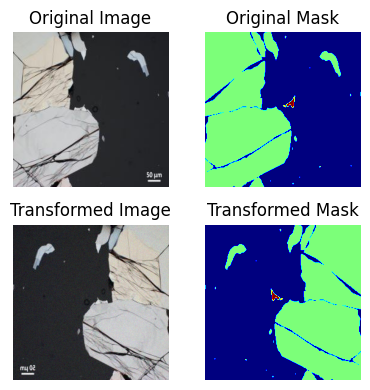

Augmented image 1


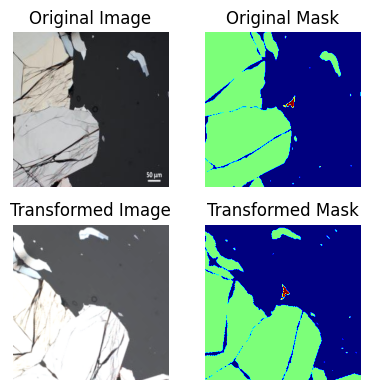

Augmented image 2


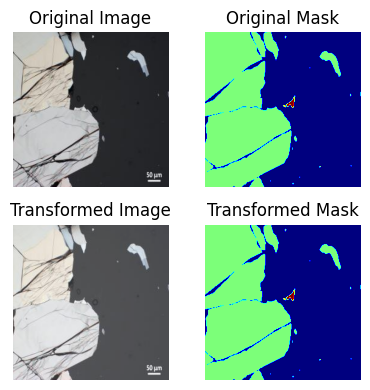

Augmented image 3


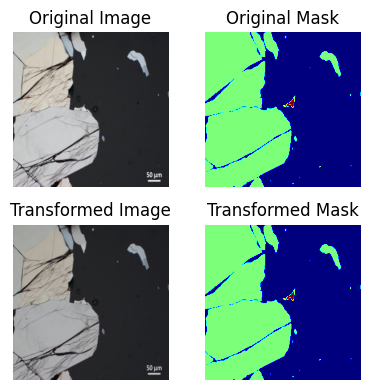

Augmented image 4


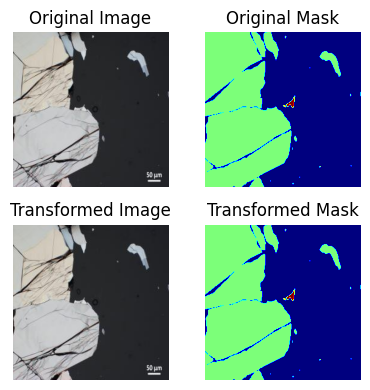

Augmented image 5


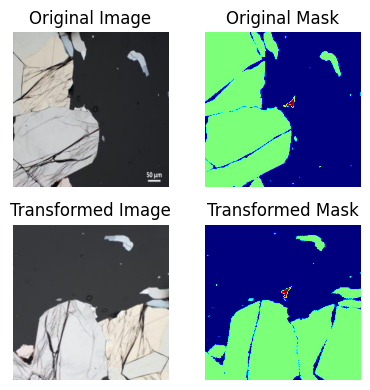

Augmented image 6


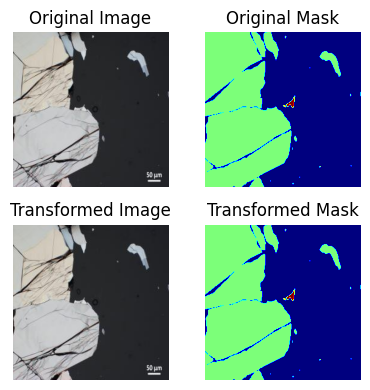

Augmented image 7


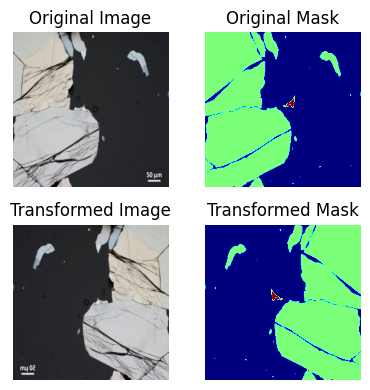

Augmented image 8


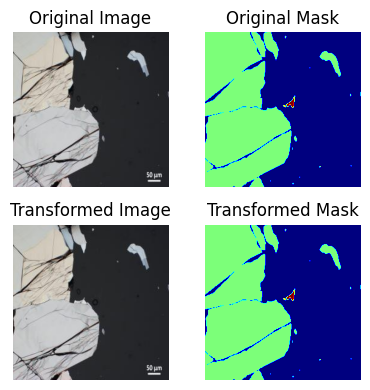

Augmented image 9


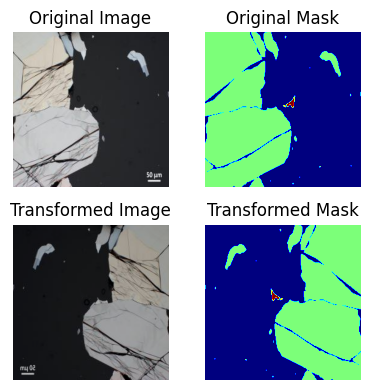

In [ ]:
for i, (aug_img, aug_mask) in enumerate(zip(augment_images, augment_masks)):
  print(f"Augmented image {i}")
  compare_images_and_masks(ORIGINAL_IMG, ORIGINAL_MASK, aug_img, aug_mask, figsize=(4,4))

Con la función
`
augment_image
`
construiremos el dataset aumentado. Agora sigue agregar la imagen y máscara original a las respectivas listas aumentadas



## Concatenado con img original

In [ ]:
orig_img = [ORIGINAL_IMG]
orig_mask = [ORIGINAL_MASK]
concat_imgs = orig_img + augment_images
concat_masks = orig_mask + augment_masks

len(concat_imgs), len(concat_masks)

(11, 11)

In [ ]:
len(augment_images)

10

## Gaussian Blur

Fianlmente se hace un gaussian blur sobre TODAS las imagenes de la lista.

In [ ]:
from skimage.filters import gaussian

In [ ]:
def apply_gaussian_filter(image, sigma=1.0):
    """
    Apply Gaussian filter to an image using scikit-image.

    Args:
    - image (np.ndarray): Input image (can be RGB or grayscale).
    - sigma (float): Standard deviation of the Gaussian filter.
                     Larger values result in stronger blur.

    Returns:
    - blurred_image (np.ndarray): The blurred image.
    """
    # Apply Gaussian filter
    blurred_image = gaussian(image, sigma=sigma)
    blurred_image_uint8 = (blurred_image * 255).astype(np.uint8)
    return blurred_image_uint8

array([[[184, 184, 182],
        [185, 185, 183],
        [186, 186, 184],
        ...,
        [ 30,  31,  34],
        [ 30,  31,  34],
        [ 30,  31,  34]],

       [[184, 184, 182],
        [185, 185, 183],
        [186, 186, 184],
        ...,
        [ 30,  31,  34],
        [ 30,  31,  34],
        [ 30,  31,  34]],

       [[185, 185, 182],
        [185, 185, 183],
        [187, 187, 184],
        ...,
        [ 30,  31,  34],
        [ 30,  31,  34],
        [ 30,  31,  34]],

       ...,

       [[196, 197, 199],
        [197, 197, 200],
        [197, 197, 200],
        ...,
        [ 34,  35,  38],
        [ 34,  35,  38],
        [ 34,  35,  38]],

       [[195, 195, 198],
        [191, 191, 194],
        [188, 187, 190],
        ...,
        [ 34,  35,  38],
        [ 34,  35,  38],
        [ 34,  35,  38]],

       [[195, 194, 198],
        [183, 183, 186],
        [178, 176, 179],
        ...,
        [ 34,  35,  38],
        [ 34,  35,  38],
        [ 34,  35,  38]]], dtype=uint8)
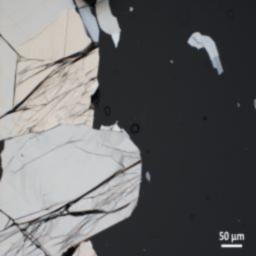

In [ ]:
apply_gaussian_filter(concat_imgs[0], sigma=0.7)

Aplicamos el gaussian filter a cada imagen

In [ ]:
final_images = []
for img in concat_imgs:
  final_images.append(apply_gaussian_filter(ORIGINAL_IMG, sigma=0.7))

array([[[184, 184, 182],
        [185, 185, 183],
        [186, 186, 184],
        ...,
        [ 30,  31,  34],
        [ 30,  31,  34],
        [ 30,  31,  34]],

       [[184, 184, 182],
        [185, 185, 183],
        [186, 186, 184],
        ...,
        [ 30,  31,  34],
        [ 30,  31,  34],
        [ 30,  31,  34]],

       [[185, 185, 182],
        [185, 185, 183],
        [187, 187, 184],
        ...,
        [ 30,  31,  34],
        [ 30,  31,  34],
        [ 30,  31,  34]],

       ...,

       [[196, 197, 199],
        [197, 197, 200],
        [197, 197, 200],
        ...,
        [ 34,  35,  38],
        [ 34,  35,  38],
        [ 34,  35,  38]],

       [[195, 195, 198],
        [191, 191, 194],
        [188, 187, 190],
        ...,
        [ 34,  35,  38],
        [ 34,  35,  38],
        [ 34,  35,  38]],

       [[195, 194, 198],
        [183, 183, 186],
        [178, 176, 179],
        ...,
        [ 34,  35,  38],
        [ 34,  35,  38],
        [ 34,  35,  38]]], dtype=uint8)
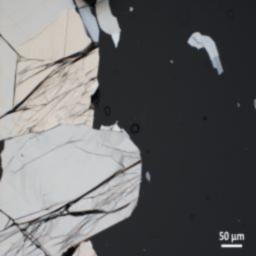

In [ ]:
idx = np.random.randint(0, len(final_images))
final_images[idx]

## Pipeline Final

Ahora construimos la función que realiará todo el pipeline del aumentado de las imágenes

In [ ]:
def augmentation_pipeline(imgs: list, masks: list, N: int, filter_callback = None):
    """
    Applies an augmentation pipeline to a list of images and their corresponding masks.

    This function generates augmented images and masks by applying a specified
    augmentation method to each image-mask pair. It also allows for an optional
    filtering step on the augmented images using a callback function.

    Parameters:
    - imgs (list): A list of input images to be augmented.
    - masks (list): A list of corresponding masks for each input image.
    - N (int): The number of augmentations to generate for each image-mask pair.
    - filter_callback (callable, optional): A callback function that takes an image
      as input and returns a filtered image. If None, a default Gaussian filter
      with sigma=0.7 will be applied.

    Returns:
    - final_images (list): A list containing the original and augmented images
      after filtering.
    - final_masks (list): A list containing the original and augmented masks.

    Example:
    >>> augmented_images, augmented_masks = augmentation_pipeline(images, masks, N=5)

    Notes:
    - The function uses `augment_image` to generate augmentations for each image-mask pair.
    - The filtering is applied to both the original and augmented images before they are returned.
    """

    if filter_callback is None:
        apply_filter = lambda x: apply_gaussian_filter(x, sigma=0.7)
    else:
        apply_filter = filter_callback

    final_images = []
    final_masks = []

    for i, m in zip(imgs, masks):
        # Generate augmented images and masks
        augment_images, augment_masks = augment_image_V2(i, m, N)

        # Concatenate original and augmented images/masks
        concat_imgs = [i] + augment_images
        concat_masks = [m] + augment_masks

        # Apply the specified filter to each concatenated image
        concat_imgs_filtered = list(map(apply_filter, concat_imgs))

        # Append filtered images and original/augmented masks to final lists
        final_images += concat_imgs_filtered  # Append filtered imgs
        final_masks += concat_masks            # Append masks

    return final_images, final_masks

In [ ]:
final_imgs_test, final_masks_test = augmentation_pipeline([ORIGINAL_IMG], [ORIGINAL_MASK], 10)

In [ ]:
np.shape(final_imgs_test), np.shape(final_masks_test)

((11, 256, 256, 3), (11, 256, 256))

Augmented image 0


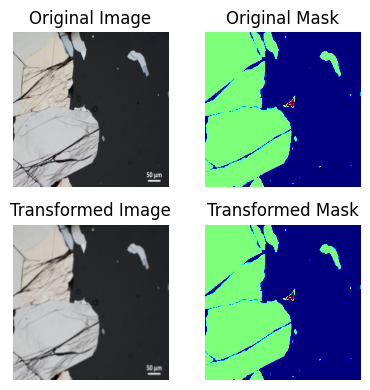

Augmented image 1


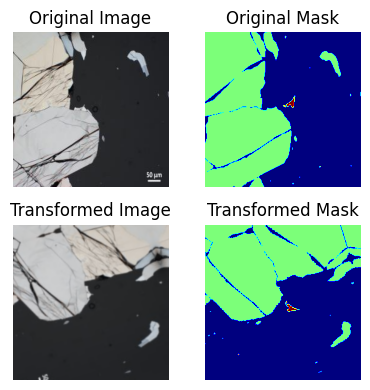

Augmented image 2


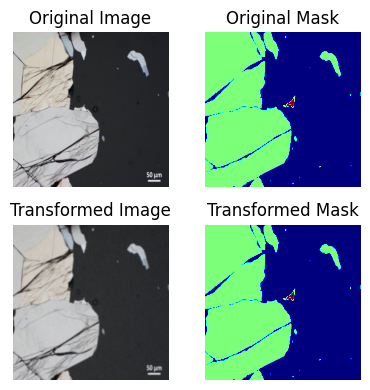

Augmented image 3


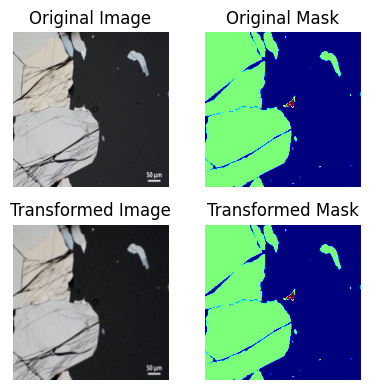

Augmented image 4


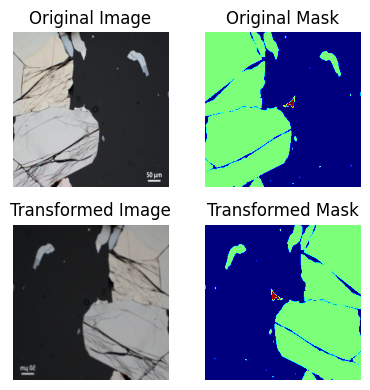

Augmented image 5


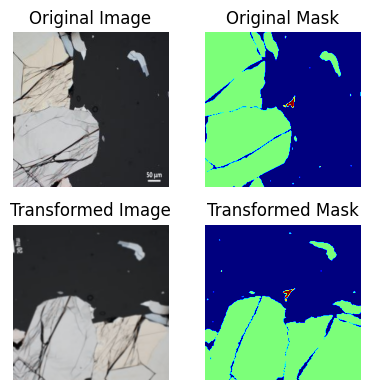

Augmented image 6


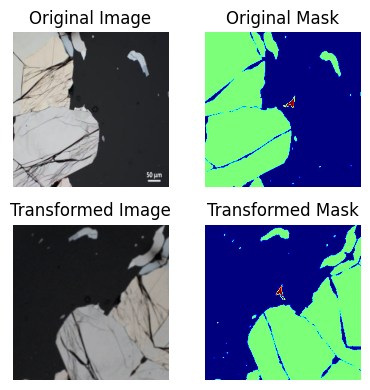

Augmented image 7


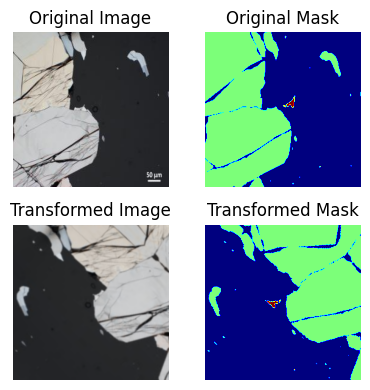

Augmented image 8


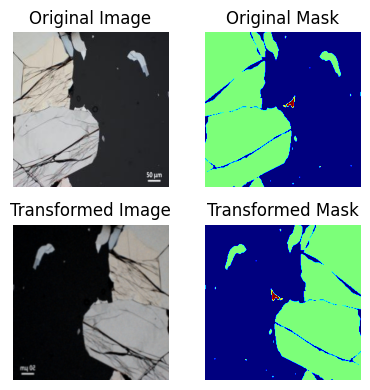

Augmented image 9


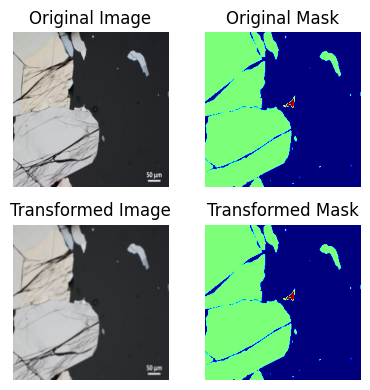

Augmented image 10


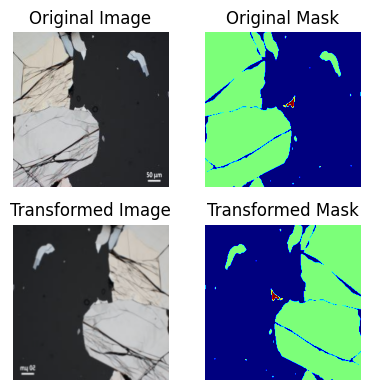

In [ ]:
for i, (aug_img, aug_mask) in enumerate(zip(final_imgs_test, final_masks_test)):
  print(f"Augmented image {i}")
  compare_images_and_masks(ORIGINAL_IMG, ORIGINAL_MASK, aug_img, aug_mask, figsize=(4,4))

In [ ]:
np.allclose(final_imgs_test[0], img)

False

array([[[184, 184, 182],
        [185, 185, 183],
        [186, 186, 184],
        ...,
        [ 30,  31,  34],
        [ 30,  31,  34],
        [ 30,  31,  34]],

       [[184, 184, 182],
        [185, 185, 183],
        [186, 186, 184],
        ...,
        [ 30,  31,  34],
        [ 30,  31,  34],
        [ 30,  31,  34]],

       [[185, 185, 182],
        [185, 185, 183],
        [187, 187, 184],
        ...,
        [ 30,  31,  34],
        [ 30,  31,  34],
        [ 30,  31,  34]],

       ...,

       [[196, 197, 199],
        [197, 197, 200],
        [197, 197, 200],
        ...,
        [ 34,  35,  38],
        [ 34,  35,  38],
        [ 34,  35,  38]],

       [[195, 195, 198],
        [191, 191, 194],
        [188, 187, 190],
        ...,
        [ 34,  35,  38],
        [ 34,  35,  38],
        [ 34,  35,  38]],

       [[195, 194, 198],
        [183, 183, 186],
        [178, 176, 179],
        ...,
        [ 34,  35,  38],
        [ 34,  35,  38],
        [ 34,  35,  38]]], dtype=uint8)
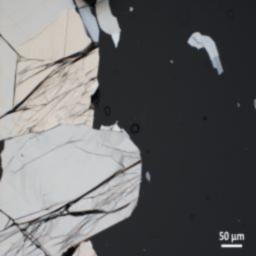

In [ ]:
final_imgs_test[0]

array([[[184, 186, 181],
        [185, 187, 182],
        [186, 188, 183],
        ...,
        [ 30,  31,  36],
        [ 30,  31,  36],
        [ 30,  31,  36]],

       [[184, 186, 181],
        [185, 187, 182],
        [186, 188, 183],
        ...,
        [ 30,  31,  36],
        [ 30,  31,  36],
        [ 30,  31,  36]],

       [[185, 187, 182],
        [185, 187, 182],
        [187, 189, 184],
        ...,
        [ 30,  31,  36],
        [ 30,  31,  36],
        [ 30,  31,  36]],

       ...,

       [[196, 195, 200],
        [200, 199, 204],
        [204, 202, 207],
        ...,
        [ 34,  35,  40],
        [ 34,  35,  40],
        [ 34,  35,  40]],

       [[198, 195, 202],
        [191, 188, 195],
        [192, 187, 194],
        ...,
        [ 34,  35,  40],
        [ 34,  35,  40],
        [ 34,  35,  40]],

       [[200, 197, 204],
        [179, 176, 183],
        [173, 168, 175],
        ...,
        [ 34,  35,  40],
        [ 34,  35,  40],
        [ 34,  35,  40]]], dtype=uint8)
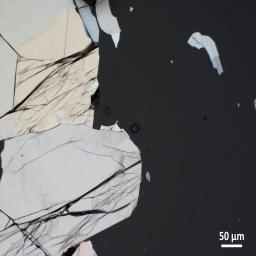

In [ ]:
ORIGINAL_IMG

# Apéndice: Generación de probabilidades para transformaciones

In [ ]:
# Generate a random array of zeros and ones
def my_arr_experiment(size, N=100):
    zeros_counter = 0
    for i in range(N):
      random_array = np.random.randint(2, size=size)
      if (np.all(random_array == 0)):
        zeros_counter += 1
    return zeros_counter

In [ ]:
zeros_prob = my_arr_experiment(4, N=100)
print(zeros_prob)

2


In [ ]:
result = zeros_arr_generator(4)
print(result)

[0 1 1 1]
